In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


In [2]:
# read in data file
readcsv = pd.read_csv("Data.csv")
readcsv.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


In [3]:
sandbox = readcsv.copy()

In [4]:
# filter out rows with no listing price
sandbox.drop(sandbox[sandbox["Listing Price"] == 0].index, inplace = True)

In [5]:
# filter out rows with no reviews
sandbox.drop(sandbox[sandbox["Reviews"] == 0].index, inplace = True)
len(sandbox)

2752

In [6]:
# filter out rows with no ratings
sandbox.drop(sandbox[sandbox["Rating"] == 0].index, inplace = True)
len(sandbox)

2680

In [7]:
sandbox.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


In [8]:
#add columns for Adidas/Nike distinction and gender market
sandbox['True_Brand']= ""
sandbox['Gender'] = ""

sandbox.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,True_Brand,Gender
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14,,
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15,,
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15,,
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15,,
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15,,


In [9]:
#finding array of unique brands (justifying our Nike or Adidas logic)
sandbox["Brand"].unique()

array(['Adidas Adidas ORIGINALS', 'Adidas ORIGINALS', 'Adidas CORE / NEO',
       'Adidas SPORT PERFORMANCE', 'Nike'], dtype=object)

In [10]:
#loop through rows to create binary Nike/ Adidas column
# for index, row in sandbox.iterrows():
#     try:
        
        
for index, row in sandbox.iterrows():
    Brand_Name = row["Brand"]
    
    if Brand_Name == 'Nike':
        sandbox.loc[[index], "True_Brand"]= "Nike"
    else:
        sandbox.loc[[index], "True_Brand"]= "Adidas"
sandbox

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,True_Brand,Gender
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14,Adidas,
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15,Adidas,
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15,Adidas,
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15,Adidas,
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15,Adidas,
...,...,...,...,...,...,...,...,...,...,...,...,...
3248,Nike Zoom Pegasus Turbo XX,AR4347-600,16995,13597,0,Nike,"Bridging performance and style, the Nike Zoom ...",1.0,1,2020-04-13T15:38:54,Nike,
3255,Nike Zoom Pegasus Turbo 2 Special Edition,BV7757-500,15995,12797,0,Nike,The Nike Zoom Pegasus Turbo 2 is updated with ...,5.0,1,2020-04-13T15:39:05,Nike,
3261,Kyrie 6 'Enlightenment',BQ4630-500,10995,8797,0,Nike,"In spiritual circles, the colour purple repres...",4.4,10,2020-04-13T15:40:56,Nike,
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020-04-13T15:41:01,Nike,


In [11]:
#Do the same thing for gender
# sandbox.loc[[index], "True_Brand"]= "Nike"

for index, row in sandbox.iterrows():
    #sandbox['Product_Name'] = row["Product_Name"]
    if row["Product Name"].lower().find("women")!= -1:
        sandbox.loc[index, "Gender"]= "Women"
    elif row["Product Name"].lower().find("men")!= -1:
        sandbox.loc[index, "Gender"]= "Men"
    elif row["Product Name"].lower().find("unisex")!= -1:
        sandbox.loc[index, "Gender"]= "Unisex"      

    elif row["Description"].lower().find("women")!= -1:
        sandbox.loc[index, "Gender"]= "Women"
    elif row["Description"].lower().find("men")!= -1:
        sandbox.loc[index, "Gender"]= "Men"
    elif row["Description"].lower().find("unisex")!= -1:
        sandbox.loc[index, "Gender"]= "Unisex"      
    else:
        sandbox.loc[index, "Gender"]= "Unknown"


In [12]:
sandbox["Gender"].value_counts()

Men        1707
Women       763
Unknown     113
Unisex       97
Name: Gender, dtype: int64

In [13]:
sandbox

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,True_Brand,Gender
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14,Adidas,Women
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15,Adidas,Women
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15,Adidas,Women
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15,Adidas,Women
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15,Adidas,Women
...,...,...,...,...,...,...,...,...,...,...,...,...
3248,Nike Zoom Pegasus Turbo XX,AR4347-600,16995,13597,0,Nike,"Bridging performance and style, the Nike Zoom ...",1.0,1,2020-04-13T15:38:54,Nike,Women
3255,Nike Zoom Pegasus Turbo 2 Special Edition,BV7757-500,15995,12797,0,Nike,The Nike Zoom Pegasus Turbo 2 is updated with ...,5.0,1,2020-04-13T15:39:05,Nike,Unknown
3261,Kyrie 6 'Enlightenment',BQ4630-500,10995,8797,0,Nike,"In spiritual circles, the colour purple repres...",4.4,10,2020-04-13T15:40:56,Nike,Men
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020-04-13T15:41:01,Nike,Unknown


In [14]:
# additional data cleanup... updating the Listing Price and Sale Price
sandbox['Revised_Listing_Price'] = ""
sandbox['Revised_Sale_Price'] = ""

# sandbox = sandbox.drop(['Listing_Price', 'Sale_Price'], axis = 1)

In [15]:
#loop over all rows and convert the values in the Listing Price/Sale Price columns to dollar values.

for index, row in sandbox.iterrows():
    msrp = row["Listing Price"]
    sold_price = row["Sale Price"]
    
    sandbox.loc[[index], "Revised_Listing_Price"]= msrp / 100
    sandbox.loc[[index], "Revised_Sale_Price"]= sold_price / 100

In [16]:
sandbox

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,True_Brand,Gender,Revised_Listing_Price,Revised_Sale_Price
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14,Adidas,Women,149.99,74.99
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15,Adidas,Women,75.99,37.99
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15,Adidas,Women,9.99,5.99
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15,Adidas,Women,69.99,34.99
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15,Adidas,Women,79.99,39.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,Nike Zoom Pegasus Turbo XX,AR4347-600,16995,13597,0,Nike,"Bridging performance and style, the Nike Zoom ...",1.0,1,2020-04-13T15:38:54,Nike,Women,169.95,135.97
3255,Nike Zoom Pegasus Turbo 2 Special Edition,BV7757-500,15995,12797,0,Nike,The Nike Zoom Pegasus Turbo 2 is updated with ...,5.0,1,2020-04-13T15:39:05,Nike,Unknown,159.95,127.97
3261,Kyrie 6 'Enlightenment',BQ4630-500,10995,8797,0,Nike,"In spiritual circles, the colour purple repres...",4.4,10,2020-04-13T15:40:56,Nike,Men,109.95,87.97
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020-04-13T15:41:01,Nike,Unknown,159.95,127.97


In [17]:
#begin the pricing tier comparison of Nike and Adidas using Sale_Price
pricing_tier_df = sandbox[["True_Brand", "Revised_Sale_Price"]]
pricing_tier_df


,True_Brand,Revised_Sale_Price
0,Adidas,74.99
1,Adidas,37.99
2,Adidas,5.99
3,Adidas,34.99
4,Adidas,39.99
...,...,...
3248,Nike,135.97
3255,Nike,127.97
3261,Nike,87.97
3263,Nike,127.97


In [18]:
# bins = [0, 24.99, 49.99, 74.99, 99.99, 124.99, 149.99, 174.99, 199.99, 3000] --> this is at $25 increment which seemed 
# too narrow so trying $50 increment
bins = [0, 49.99, 99.99, 149.99, 199.99, 3000]
# labels = ["<$24.99","$25-49.99", "$50-74.99", "$75-99.99", "$100-124.99", "$125-149.99", "$150-174.99", "$175-199.99", "$200+"]
labels = ["<$50","$50-99.99", "$100-149.99", "$150-199.99", "$200+"]

pricing_tier_df["Sale_Price_Tier"] = pd.cut(pricing_tier_df["Revised_Sale_Price"],bins,labels = labels )
pricing_tier_df.reset_index()

<ipython-input-18-73d4301b8f1f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pricing_tier_df["Sale_Price_Tier"] = pd.cut(pricing_tier_df["Revised_Sale_Price"],bins,labels = labels )


,index,True_Brand,Revised_Sale_Price,Sale_Price_Tier
0,0,Adidas,74.99,$50-99.99
1,1,Adidas,37.99,<$50
2,2,Adidas,5.99,<$50
3,3,Adidas,34.99,<$50
4,4,Adidas,39.99,<$50
...,...,...,...,...
2675,3248,Nike,135.97,$100-149.99
2676,3255,Nike,127.97,$100-149.99
2677,3261,Nike,87.97,$50-99.99
2678,3263,Nike,127.97,$100-149.99


In [19]:
#create a new Nike dataframe
nike_pricing_df = pricing_tier_df[pricing_tier_df["True_Brand"] == 'Nike']

#create a total count of Nike products.  
nike_total_product_count = nike_pricing_df["True_Brand"].count()
nike_total_product_count

nike_count_per_tier = nike_pricing_df["Sale_Price_Tier"].value_counts()

#calculate the % to total per each price tier
nike_percent_to_total = (nike_count_per_tier / nike_total_product_count)*100

#create a new Nike dataframe that shows the count of product in each price tier as well as % to Total
nike_summary = pd.DataFrame({"Nike Product Count": nike_count_per_tier,
                                    "% to Total (Nike Sale Price)": nike_percent_to_total})

nike_summary = nike_summary.sort_index()
nike_summary


,Nike Product Count,% to Total (Nike Sale Price)
<$50,14,9.032258
$50-99.99,96,61.935484
$100-149.99,44,28.387097
$150-199.99,1,0.645161
$200+,0,0.000000


In [20]:
#create a new Adidas dataframe
adidas_pricing_df = pricing_tier_df[pricing_tier_df["True_Brand"] == 'Adidas']

#create a total count of Nike products.  
adidas_total_product_count = adidas_pricing_df["True_Brand"].count()
adidas_total_product_count

adidas_count_per_tier = adidas_pricing_df["Sale_Price_Tier"].value_counts()

#calculate the % to total per each price tier
adidas_percent_to_total = (adidas_count_per_tier / adidas_total_product_count)*100

#create a new Nike dataframe that shows the count of product in each price tier as well as % to Total
adidas_summary = pd.DataFrame({"Adidas Product Count": adidas_count_per_tier,
                                    "% to Total (Adidas Sale Price)": adidas_percent_to_total})

adidas_summary = adidas_summary.sort_index()
adidas_summary



,Adidas Product Count,% to Total (Adidas Sale Price)
<$50,1677,66.415842
$50-99.99,629,24.910891
$100-149.99,166,6.574257
$150-199.99,38,1.504950
$200+,15,0.594059


In [21]:
# pricing_comparison = pd.merge(adidas_summary,nike_summary)
pricing_comparison = pd.concat([adidas_summary, nike_summary], axis=1, sort=False)                   
pricing_comparison

,Adidas Product Count,% to Total (Adidas Sale Price),Nike Product Count,% to Total (Nike Sale Price)
<$50,1677,66.415842,14,9.032258
$50-99.99,629,24.910891,96,61.935484
$100-149.99,166,6.574257,44,28.387097
$150-199.99,38,1.504950,1,0.645161
$200+,15,0.594059,0,0.000000


In [22]:
# pricing_comparison.dtypes

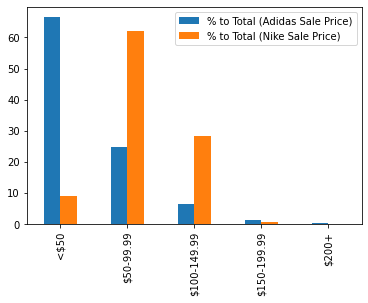

In [23]:
pricing_comparison[['% to Total (Adidas Sale Price)','% to Total (Nike Sale Price)']].plot(kind='bar')

plt.show()

In [24]:
#begin the pricing tier comparison of Nike and Adidas using Listing_Price
pricing_tier_df2 = sandbox[["True_Brand", "Revised_Listing_Price"]]
pricing_tier_df2.reset_index()

,index,True_Brand,Revised_Listing_Price
0,0,Adidas,149.99
1,1,Adidas,75.99
2,2,Adidas,9.99
3,3,Adidas,69.99
4,4,Adidas,79.99
...,...,...,...
2675,3248,Nike,169.95
2676,3255,Nike,159.95
2677,3261,Nike,109.95
2678,3263,Nike,159.95


In [26]:
# bins = [0, 24.99, 49.99, 74.99, 99.99, 124.99, 149.99, 174.99, 199.99, 3000] --> this is at $25 increment which seemed 
# too narrow so trying $50 increment
bins = [0, 49.99, 99.99, 149.99, 199.99, 3000]
# labels = ["<$24.99","$25-49.99", "$50-74.99", "$75-99.99", "$100-124.99", "$125-149.99", "$150-174.99", "$175-199.99", "$200+"]
labels = ["<$50","$50-99.99", "$100-149.99", "$150-199.99", "$200+"]

pricing_tier_df2["List_Price_Tier"] = pd.cut(pricing_tier_df2["Revised_Listing_Price"],bins,labels = labels )
pricing_tier_df2
#Why does indexing get whacky each tmie??

<ipython-input-26-cafb6d7416cf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pricing_tier_df2["List_Price_Tier"] = pd.cut(pricing_tier_df2["Revised_Listing_Price"],bins,labels = labels )


,True_Brand,Revised_Listing_Price,List_Price_Tier
0,Adidas,149.99,$100-149.99
1,Adidas,75.99,$50-99.99
2,Adidas,9.99,<$50
3,Adidas,69.99,$50-99.99
4,Adidas,79.99,$50-99.99
...,...,...,...
3248,Nike,169.95,$150-199.99
3255,Nike,159.95,$150-199.99
3261,Nike,109.95,$100-149.99
3263,Nike,159.95,$150-199.99


In [30]:
#create a new Nike dataframe w/ List_Price and Pricing Tier
nike_pricing_df2 = pricing_tier_df2[pricing_tier_df2["True_Brand"] == 'Nike']

#create a total count of Nike products.  
nike_total_product_count2 = nike_pricing_df2["True_Brand"].count()
nike_total_product_count2

nike_count_per_tier2 = nike_pricing_df2["List_Price_Tier"].value_counts()

#calculate the % to total per each price tier
nike_percent_to_total2 = (nike_count_per_tier2 / nike_total_product_count2)*100

#create a new Nike dataframe that shows the count of product in each price tier as well as % to Total
nike_summary2 = pd.DataFrame({"Nike Product Count2": nike_count_per_tier2,
                                    "% to Total (Nike MSRP)": nike_percent_to_total2})

nike_summary2 = nike_summary2.sort_index()
nike_summary2

,Nike Product Count2,% to Total (Nike MSRP)
<$50,7,4.516129
$50-99.99,56,36.129032
$100-149.99,53,34.193548
$150-199.99,39,25.161290
$200+,0,0.000000


In [32]:
#create a new Nike dataframe w/ List_Price and Pricing Tier
adidas_pricing_df2 = pricing_tier_df2[pricing_tier_df2["True_Brand"] == 'Adidas']

#create a total count of Nike products.  
adidas_total_product_count2 = adidas_pricing_df2["True_Brand"].count()
adidas_total_product_count2

adidas_count_per_tier2 = adidas_pricing_df2["List_Price_Tier"].value_counts()

#calculate the % to total per each price tier
adidas_percent_to_total2 = (adidas_count_per_tier2 / adidas_total_product_count2)*100

#create a new Nike dataframe that shows the count of product in each price tier as well as % to Total
adidas_summary2 = pd.DataFrame({"Adidas Product Count2": adidas_count_per_tier2,
                                    "% to Total (Adidas MSRP)": adidas_percent_to_total2})

adidas_summary2 = adidas_summary2.sort_index()
adidas_summary2

,Adidas Product Count2,% to Total (Adidas MSRP)
<$50,781,30.930693
$50-99.99,1229,48.673267
$100-149.99,378,14.970297
$150-199.99,108,4.277228
$200+,29,1.148515


In [33]:
#create a new dataframe by merging Nike and Adidas dataframes

pricing_comparison2 = pd.concat([adidas_summary2, nike_summary2], axis=1, sort=False)                   
pricing_comparison2

,Adidas Product Count2,% to Total (Adidas MSRP),Nike Product Count2,% to Total (Nike MSRP)
<$50,781,30.930693,7,4.516129
$50-99.99,1229,48.673267,56,36.129032
$100-149.99,378,14.970297,53,34.193548
$150-199.99,108,4.277228,39,25.161290
$200+,29,1.148515,0,0.000000


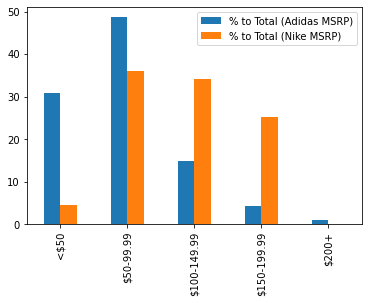

In [34]:
#plot a bar chart that compare Adidas and Nike's listing price of the products in the market in April 2020

pricing_comparison2[['% to Total (Adidas MSRP)','% to Total (Nike MSRP)']].plot(kind='bar')

plt.show()

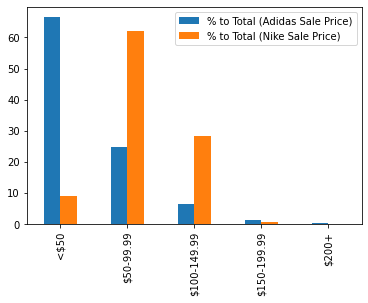

In [35]:
#plot a bar chart that compare Adidas and Nike's sale price of the products in the market in April 2020

pricing_comparison[['% to Total (Adidas Sale Price)','% to Total (Nike Sale Price)']].plot(kind='bar')

plt.show()

In [36]:
pricing_comparison3 = pd.concat([pricing_comparison, pricing_comparison2], axis=1, sort=False)   
pricing_comparison3

,Adidas Product Count,% to Total (Adidas Sale Price),Nike Product Count,% to Total (Nike Sale Price),Adidas Product Count2,% to Total (Adidas MSRP),Nike Product Count2,% to Total (Nike MSRP)
<$50,1677,66.415842,14,9.032258,781,30.930693,7,4.516129
$50-99.99,629,24.910891,96,61.935484,1229,48.673267,56,36.129032
$100-149.99,166,6.574257,44,28.387097,378,14.970297,53,34.193548
$150-199.99,38,1.504950,1,0.645161,108,4.277228,39,25.161290
$200+,15,0.594059,0,0.000000,29,1.148515,0,0.000000


<ipython-input-54-3fa3ad313ccd>:10: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(df3,labels=my_labels, autopct='%1.1f%%')


Text(0.5, 1.0, 'Adidas by MSRP')

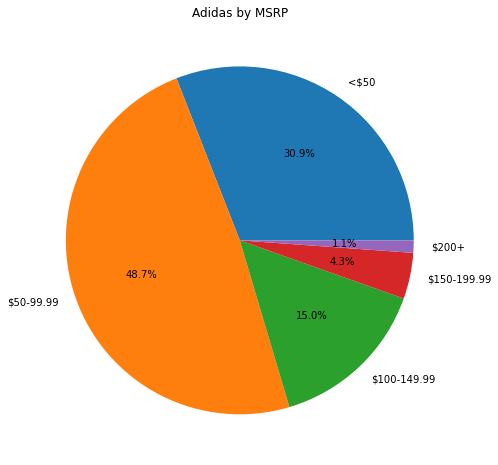

In [54]:
#Pie graph of List Price / MSRP (Adidas)

df3 = pd.DataFrame(pricing_comparison3, columns = ['Adidas Product Count2'])
#df
my_labels = '<$50','$50-99.99','$100-149.99','$150-199.99','$200+'

plt.figure(figsize=(16,8))
# df.plot(kind='pie', y = 'Adidas Product Count', autopct='%1.1f%%', 
#  startangle=90, shadow=False, labels=my_labels, legend = False, fontsize=8)
plt.pie(df3,labels=my_labels, autopct='%1.1f%%')
plt.title('Adidas by MSRP')

<ipython-input-52-1cf308cad789>:10: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(df,labels=my_labels, autopct='%1.1f%%')


Text(0.5, 1.0, 'Adidas by Sale Price')

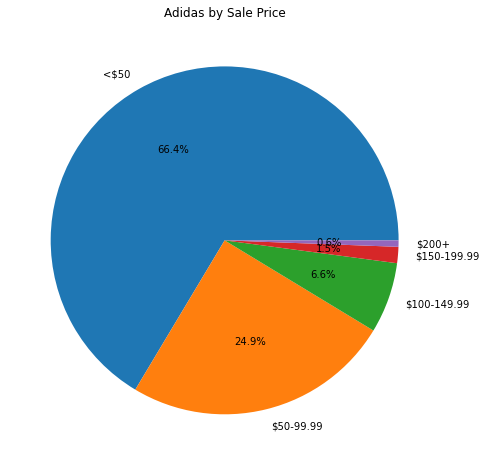

In [52]:
#Pie graph of Sale Price (Adidas)

df = pd.DataFrame(pricing_comparison3, columns = ['Adidas Product Count'])
#df
my_labels = '<$50','$50-99.99','$100-149.99','$150-199.99','$200+'

plt.figure(figsize=(16,8))
# df.plot(kind='pie', y = 'Adidas Product Count', autopct='%1.1f%%', 
#  startangle=90, shadow=False, labels=my_labels, legend = False, fontsize=8)
plt.pie(df,labels=my_labels, autopct='%1.1f%%')
plt.title('Adidas by Sale Price')

<ipython-input-56-582d97ecd8bf>:10: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(df4,labels=my_labels, autopct='%1.1f%%')


Text(0.5, 1.0, 'Nike by MSRP')

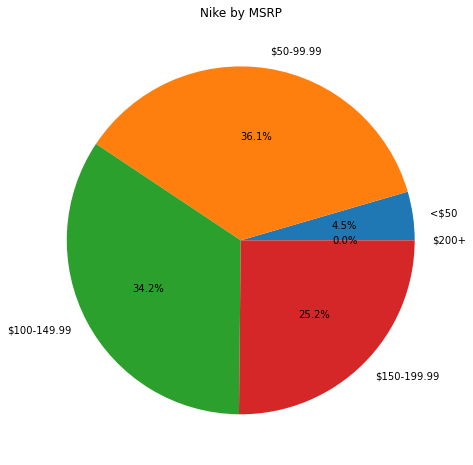

In [56]:
#Pie graph of List Price / MSRP (Nike)

df4 = pd.DataFrame(pricing_comparison3, columns = ['Nike Product Count2'])
#df
my_labels = '<$50','$50-99.99','$100-149.99','$150-199.99','$200+'

plt.figure(figsize=(16,8))
# df.plot(kind='pie', y = 'Adidas Product Count', autopct='%1.1f%%', 
#  startangle=90, shadow=False, labels=my_labels, legend = False, fontsize=8)
plt.pie(df4,labels=my_labels, autopct='%1.1f%%')
plt.title('Nike by MSRP')

<ipython-input-53-7b711d2d52b2>:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(df2,labels=my_labels, autopct='%1.1f%%')


Text(0.5, 1.0, 'Nike by Sale Price')

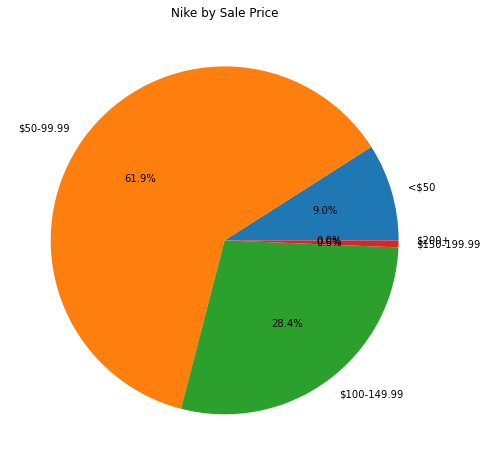

In [53]:
#Pie graph of Sale Price (Nike)

df2 = pd.DataFrame(pricing_comparison3, columns = ['Nike Product Count'])

my_labels = '<$50','$50-99.99','$100-149.99','$150-199.99','$200+'

plt.figure(figsize=(16,8))

plt.pie(df2,labels=my_labels, autopct='%1.1f%%')

plt.title('Nike by Sale Price')